# Import

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import portablelogresmodel as model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve

In [3]:
filepath = 'Datasets/dec_sep_MPHWA.csv'
df = pd.read_csv(filepath)
df = df.reset_index()

dec_path = 'Datasets/dec_MPHWA.csv'
dec_df = pd.read_csv(dec_path)
dec_df = dec_df.reset_index()

In [6]:
X_list = ['ID', 
        'PreviousMedals', 
        'Height_div_avg', 
        'Weight_div_avg', 
        'Age_div_avg'
        ]

Y_list = ['ID', 'MedalEarned']

In [4]:
W_array = np.genfromtxt('Parameters/W.csv', delimiter=',')
B_array = np.genfromtxt('Parameters/B.csv', delimiter=',')

# Run Decathlon

In [7]:
acc_l, occ_l = model.Decathlon(dec_df, X_list, Y_list, W_array, B_array, cop= 0.65)

Decathlon results: avg 87.66%  min 85.65%  max 88.57% 


# Create cm_array

In [16]:
tp,fp,tn,fn = 0,0,0,0 

# Sum up all occurances of False negatives and positives
# 1 = True Pos, 0 = True Neg, -1 = False Neg, 2 = False Pos 
for i, occ in enumerate(occ_l):
    tp += occ[1]
    tn += occ[0]
    fn += occ[-1]
    fp += occ[2]

cm =    [[tn, fp],
        [fn, tp]]

[[20720, 1080], [1887, 363]]


# Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 87.66')

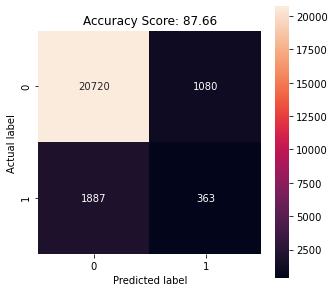

In [17]:
acc_avg = sum(acc_l) / len(acc_l)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(acc_avg * 100, 2))
plt.title(all_sample_title)